### Importing libraries and simulating data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [14]:
# dataset loading
data = pd.read_excel('Mall_Customers.xlsx')
data.head()
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA 

Creating Histograms...


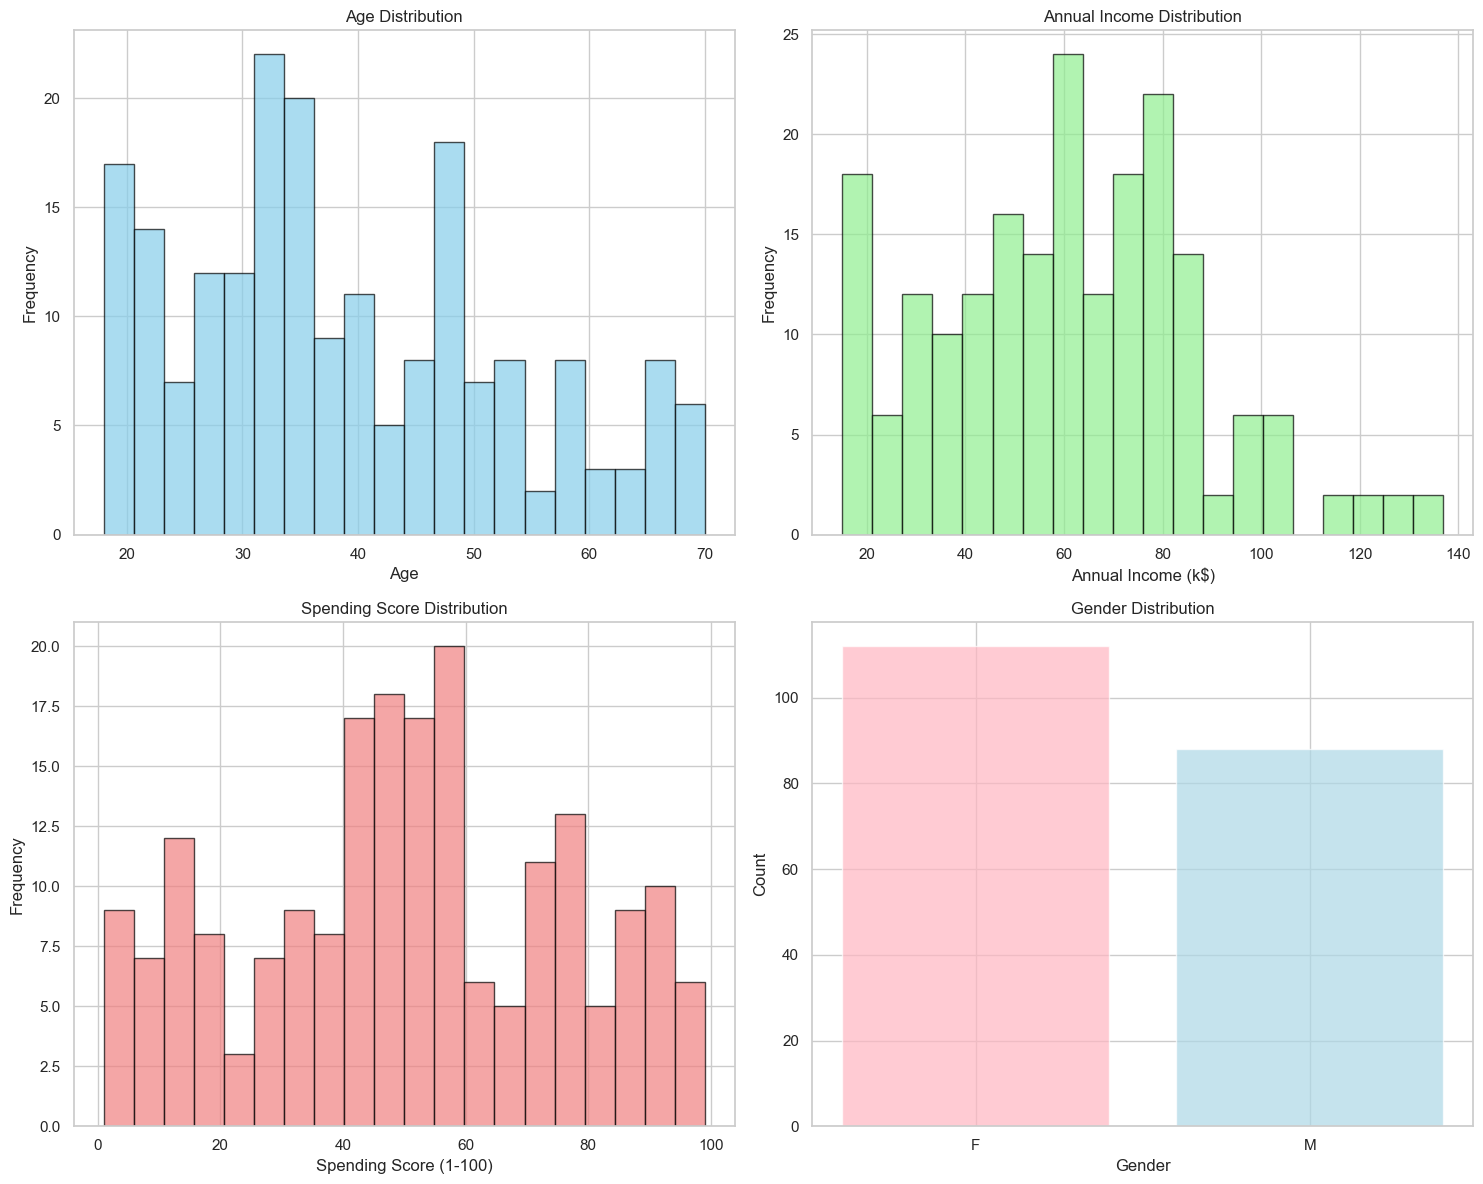

In [16]:
# Set the style for better looking plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Histograms
print("Creating Histograms...")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age Distribution
axes[0,0].hist(data['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Annual Income distribution
axes[0,1].hist(data['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Annual Income Distribution')
axes[0,1].set_xlabel('Annual Income (k$)')
axes[0,1].set_ylabel('Frequency')

# Spending Score distribution
axes[1,0].hist(data['Spending Score (1-100)'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1,0].set_title('Spending Score Distribution')
axes[1,0].set_xlabel('Spending Score (1-100)')
axes[1,0].set_ylabel('Frequency')

# Gender distribution
gender_counts = data['Gender'].value_counts()
axes[1,1].bar(gender_counts.index, gender_counts.values, color=['lightpink', 'lightblue'], alpha=0.7)
axes[1,1].set_title('Gender Distribution')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Creating Pairplot...


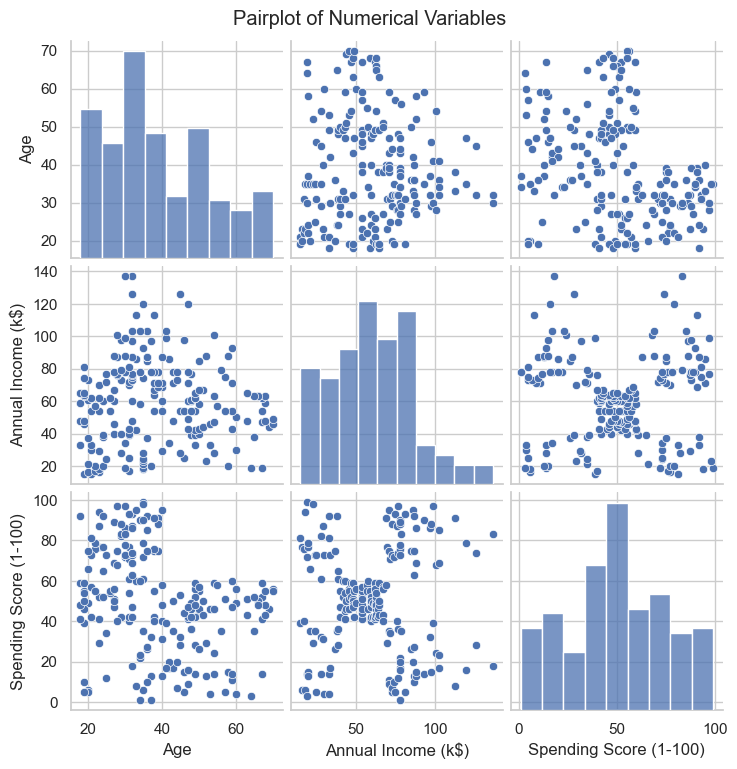

In [17]:
#PAIRPLOT
print("Creating Pairplot...")
# Select numerical columns for pairplot
numerical_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
pairplot = sns.pairplot(numerical_data, diag_kind='hist', corner=False)
pairplot.fig.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

Creating Boxplots...


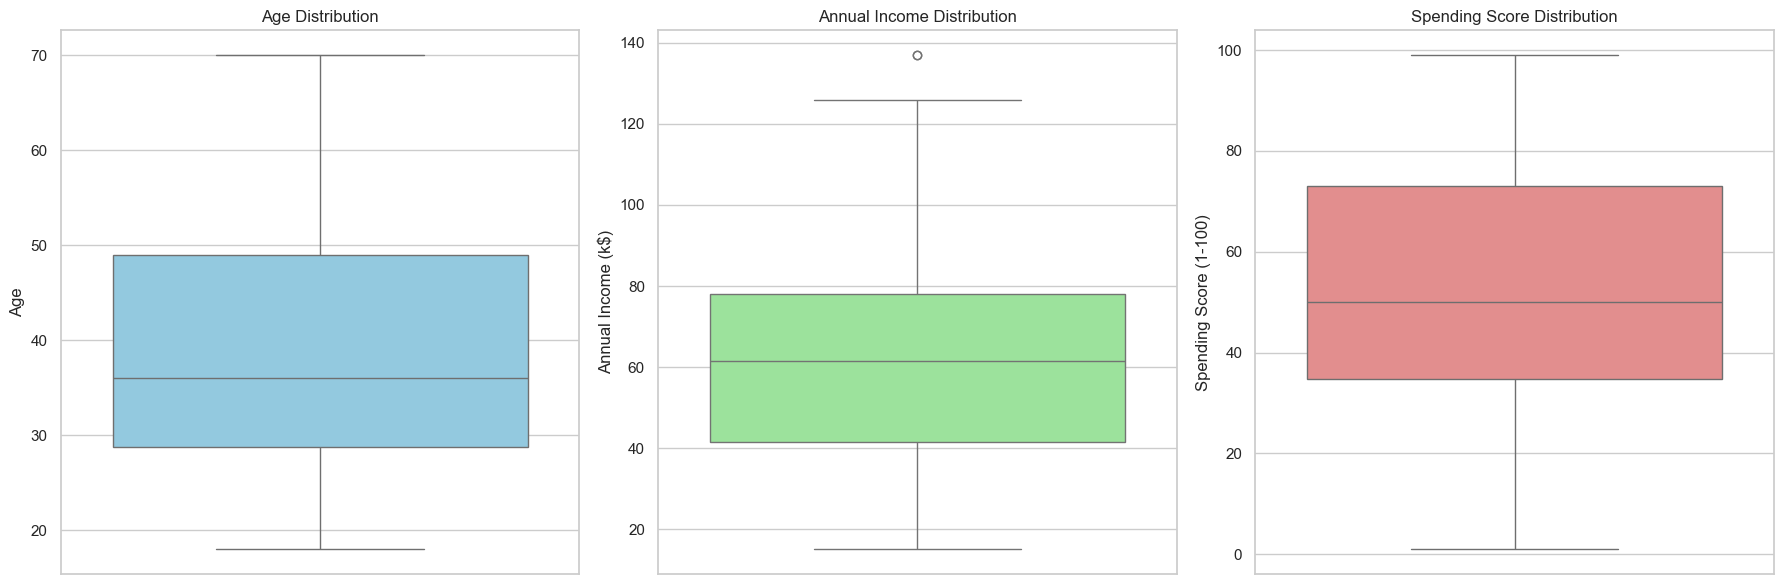

Creating Boxplots by Gender...


C:\Users\HUMAIDU\AppData\Local\Temp\ipykernel_129472\1453686467.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=data, ax=axes[0], palette=['lightpink', 'lightblue'])
C:\Users\HUMAIDU\AppData\Local\Temp\ipykernel_129472\1453686467.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, ax=axes[1], palette=['lightpink', 'lightblue'])
C:\Users\HUMAIDU\AppData\Local\Temp\ipykernel_129472\1453686467.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spendi

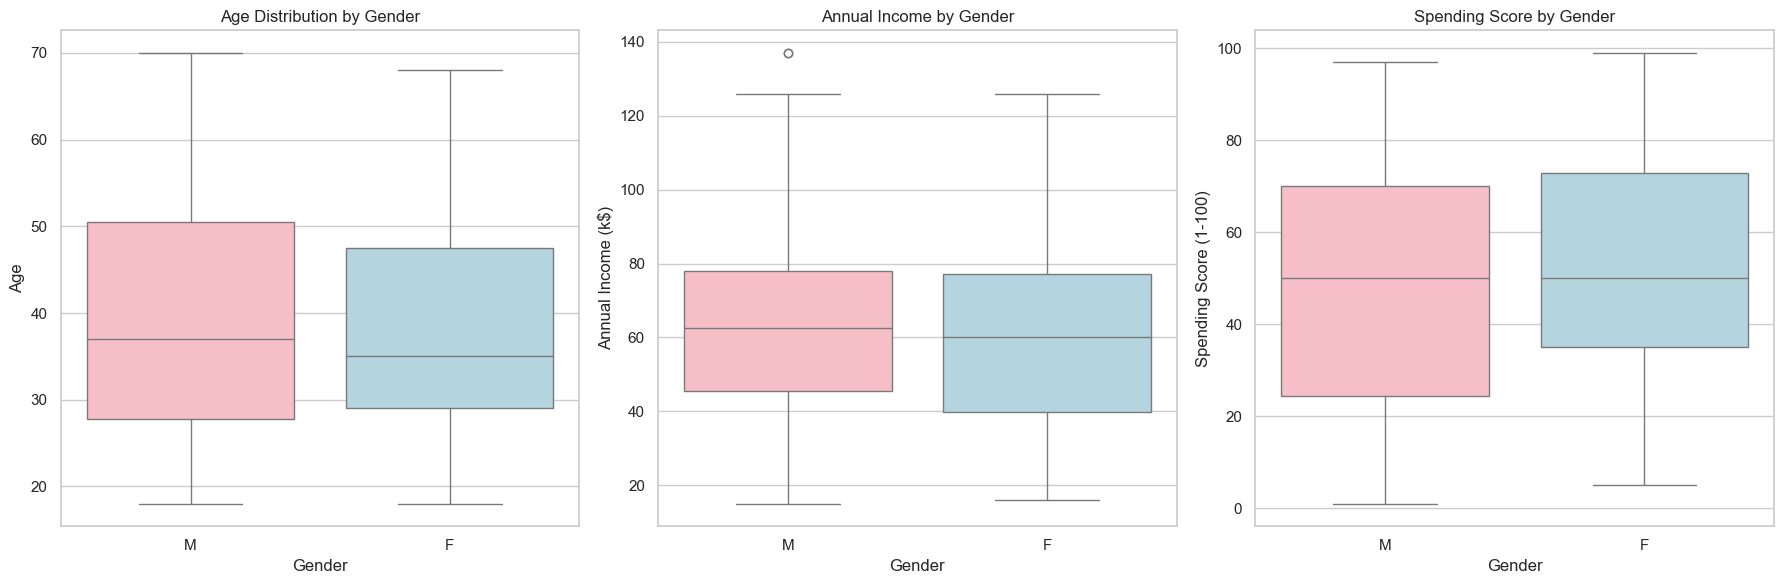

In [18]:
#BOXPLOTS
print("Creating Boxplots...")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age boxplot
sns.boxplot(y=data['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_ylabel('Age')

# Annual Income boxplot
sns.boxplot(y=data['Annual Income (k$)'], ax=axes[1], color='lightgreen')
axes[1].set_title('Annual Income Distribution')
axes[1].set_ylabel('Annual Income (k$)')

# Spending Score boxplot
sns.boxplot(y=data['Spending Score (1-100)'], ax=axes[2], color='lightcoral')
axes[2].set_title('Spending Score Distribution')
axes[2].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# Boxplots by Gender
print("Creating Boxplots by Gender...")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age by Gender
sns.boxplot(x='Gender', y='Age', data=data, ax=axes[0], palette=['lightpink', 'lightblue'])
axes[0].set_title('Age Distribution by Gender')

# Annual Income by Gender
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, ax=axes[1], palette=['lightpink', 'lightblue'])
axes[1].set_title('Annual Income by Gender')

# Spending Score by Gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, ax=axes[2], palette=['lightpink', 'lightblue'])
axes[2].set_title('Spending Score by Gender')

plt.tight_layout()
plt.show()

Creating Scatter Plots...


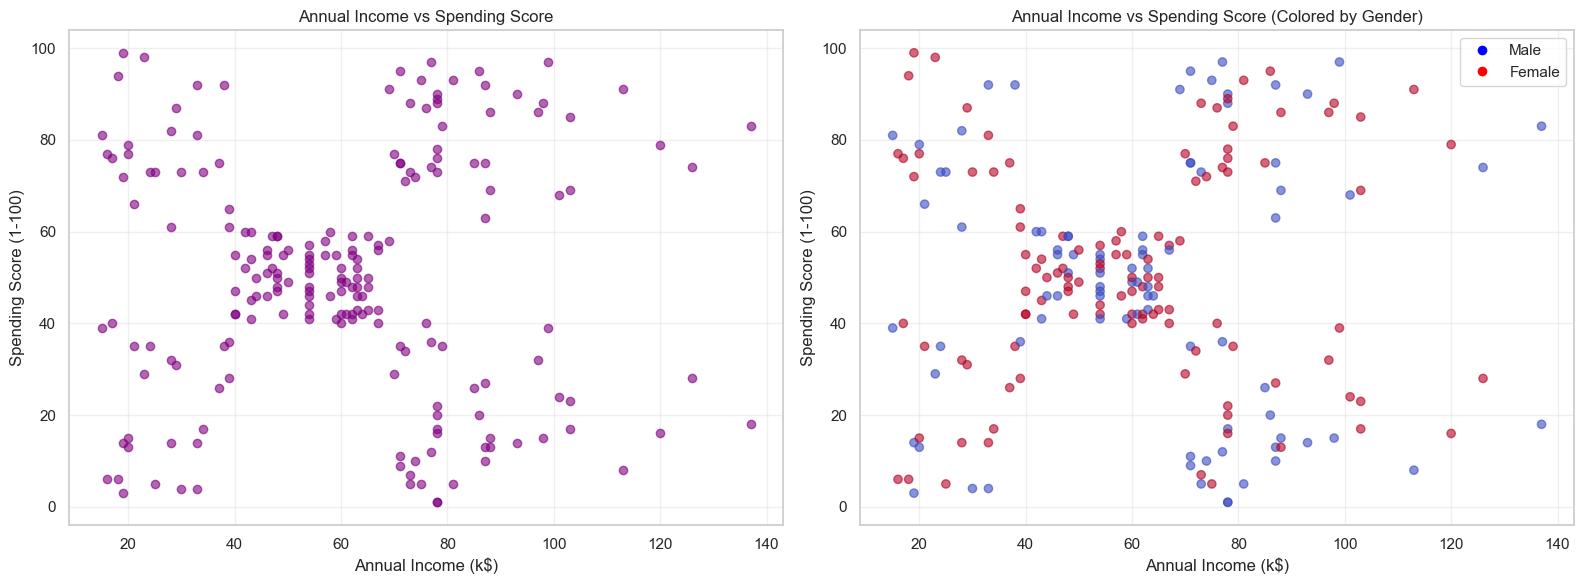

Creating Scatter Plot with Age Coloring...


C:\Users\HUMAIDU\AppData\Local\Temp\ipykernel_129472\70488456.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


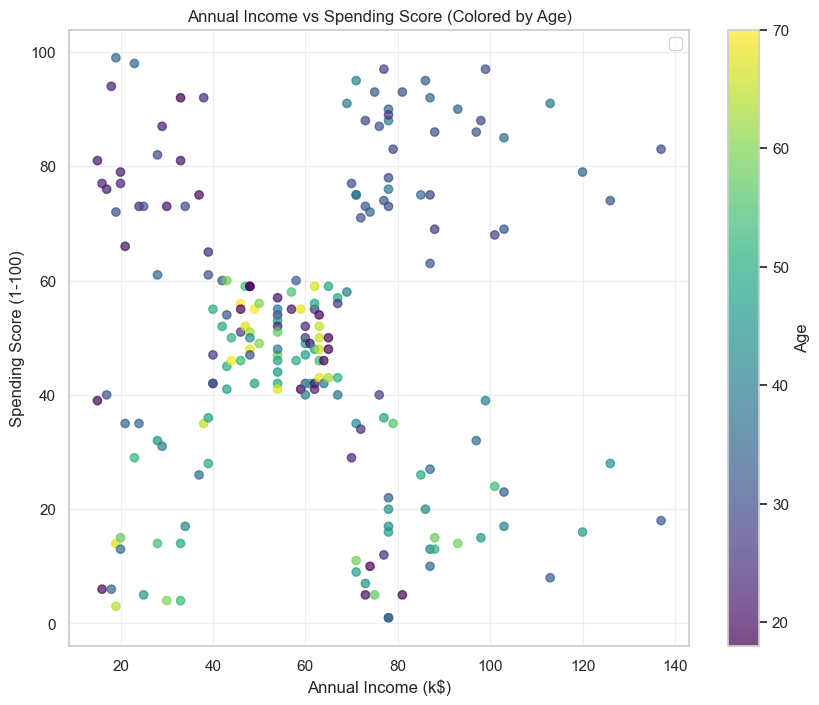

In [20]:
#SCATTER PLOTS: Income vs Spending Score
print("Creating Scatter Plots...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Basic scatter plot
axes[0].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
                alpha=0.6, color='purple')
axes[0].set_title('Annual Income vs Spending Score')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].grid(True, alpha=0.3)

# Scatter plot colored by Gender
scatter = axes[1].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
                         c=data['Gender'].map({'M': 0, 'F': 1}), 
                         alpha=0.6, cmap='coolwarm')
axes[1].set_title('Annual Income vs Spending Score (Colored by Gender)')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].grid(True, alpha=0.3)

# Create legend for gender
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Male'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Female')]
axes[1].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

# Additional scatter plot with Age as color
print("Creating Scatter Plot with Age Coloring...")
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
                     c=data['Age'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Age')
plt.title('Annual Income vs Spending Score (Colored by Age)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Feature Selection

In [21]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
# Scaling the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Choosing number of cluster

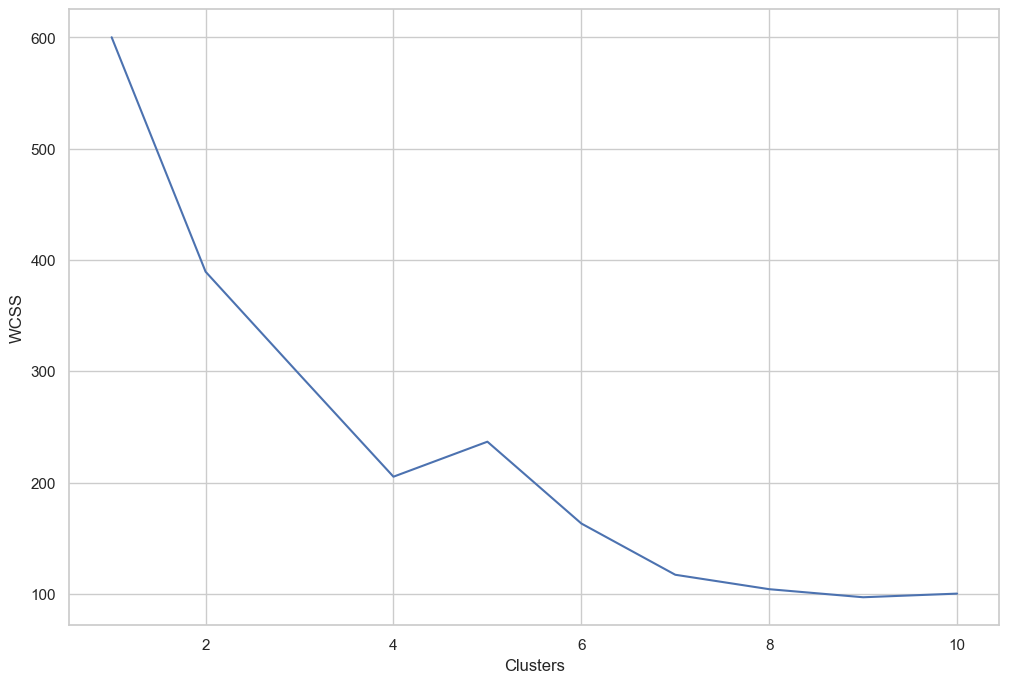

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

### Train K-Means Models

In [24]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data["Cluster"] = clusters

### Visualizing Clusters 

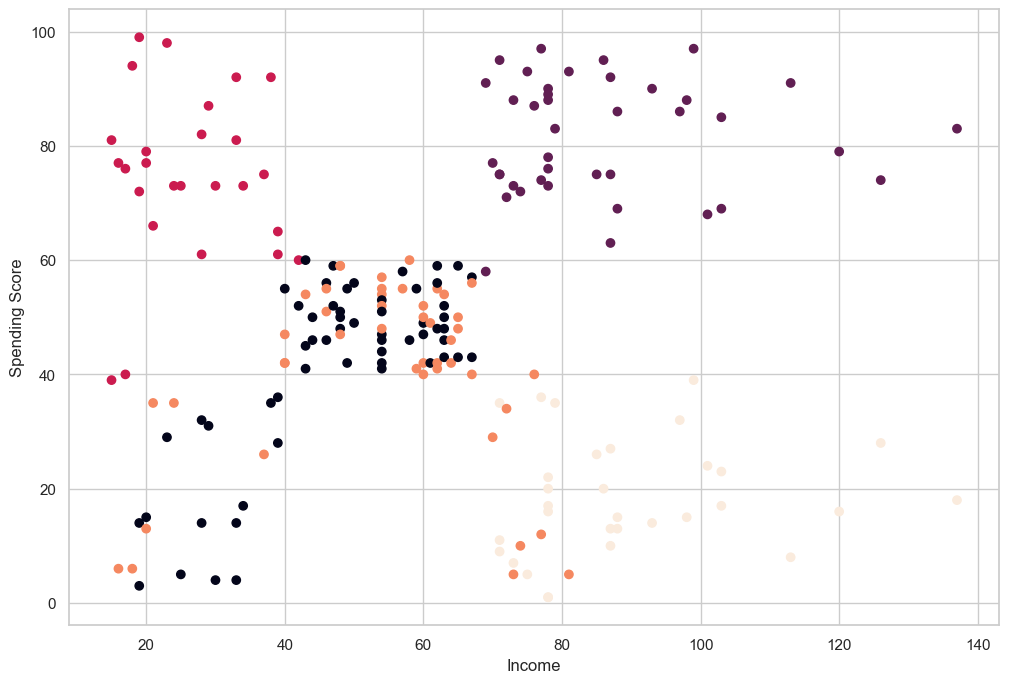

In [26]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data.Cluster)
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

In [27]:
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    features = np.array([[data["age"], data["income"], data["score"]]])
    features = scaler.transform(features)
    cluster = kmeans.predict(features)[0]
    return jsonify({"cluster": int(cluster)})

In [29]:
import streamlit as st

age = st.slider("Age", 18, 70)
income = st.slider("Income", 10, 150)
score = st.slider("Spending Score", 1, 100)

2025-11-22 19:38:34.991 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 19:38:34.992 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 19:38:34.992 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 19:38:34.993 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 19:38:34.993 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-11-22 19:38:34.994 WARNING streamlit.runtime.scriptrunner_utils.script_run_c